In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'motifs_7_classes/train/',
    target_size=(224, 224),
    #batch_size=8,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'motifs_7_classes/test/',
    target_size=(224, 224),
    #batch_size=8,
    class_mode='categorical')

# Créer un tableau numpy pour les étiquettes de classe
class_labels = list(test_generator.class_indices.keys())
print(class_labels)
class_indices = test_generator.class_indices
num_classes = len(class_labels)



Found 30 images belonging to 7 classes.
Found 18 images belonging to 7 classes.
['limestone', 'marl_limestone', 'marl_marlstone', 'salt', 'sand', 'sand_clay', 'silt']


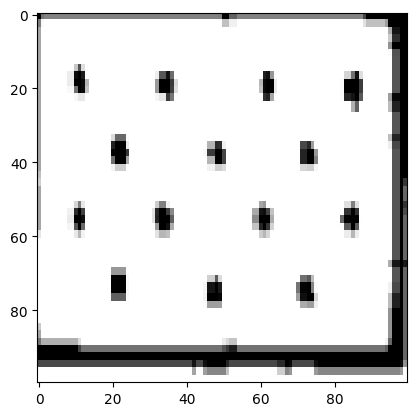

In [98]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
# Charger une image de test et effectuer la prédiction
img = load_img('motifs_7_classes/train/sand/sand1.png', target_size=(224, 224))
plt.imshow(img)

In [75]:
base_model = ResNet50(weights="imagenet", include_top=False)

model = Sequential()
model.add(base_model)
#léger fine tuning
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
#on prédit 1 des 7 classes
model.add(Dense(7, activation='softmax'))


In [36]:
#convnet clasique
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
# from tensorflow.keras.layers import Dropout

# model = Sequential(name="Scratch")


# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3), padding="same"))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units=5, activation = 'softmax'))

# model_scratch.build()
# model_scratch.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# #model_.build(input_shape)
# model_scratch.summary()

In [ ]:
#modèle plus petit : MobileNet
# base_model = MobileNetV2(weights='imagenet', include_top=False)

# model = Sequential()
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))


In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model.h5', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False,
                             mode='auto')

model.fit(train_generator,
          epochs=20,
          validation_data=test_generator,
          callbacks=[checkpoint])


Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 2.3903 - accuracy: 0.1333
Epoch 1: val_loss improved from inf to 2.98803, saving model to model.h5
1/1 [==============================] - 35s 35s/step - loss: 2.3903 - accuracy: 0.1333 - val_loss: 2.9880 - val_accuracy: 0.0556
Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 1.1265 - accuracy: 0.6667
Epoch 2: val_loss did not improve from 2.98803
1/1 [==============================] - 13s 13s/step - loss: 1.1265 - accuracy: 0.6667 - val_loss: 3.5356 - val_accuracy: 0.1667
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 2.98803
1/1 [==============================] - 13s 13s/step - loss: 0.0910 - accuracy: 1.0000 - val_loss: 3.7826 - val_accuracy: 0.1667
Epoch 4/20
1/1 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 1.0000
Epoch 4: val_loss did not improve from 2.98803
1/1 [=============================

In [77]:
#prédiction de la classe unique pour une image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

model = load_model('model.h5')

# Charger une image de test et effectuer la prédiction
img = load_img('motifs_7_classes/test/salt/salt4.png', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)

# Trouver la classe prédite et afficher le résultat
class_idx = np.argmax(preds[0])
predicted_label = class_labels[class_idx]
print("Classe prédite :", predicted_label)


1/1 [==============================] - 1s 1s/step
Classe prédite : salt


1/1 [==============================] - 1s 1s/step


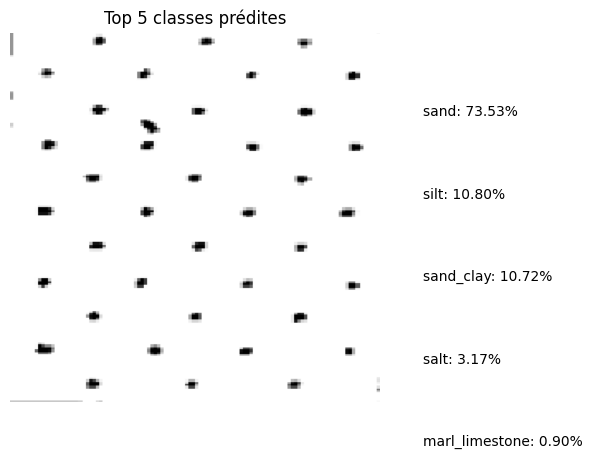

In [78]:
#prédiction du top 5 pour une image avec les probabilités
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

model = load_model('model.h5')

# Charger une image de test et effectuer la prédiction
img = load_img('motifs_7_classes/test/sand/sand18.png', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)

# Trouver les cinq classes les plus probables
top_preds = np.argsort(preds[0])[::-1][:5]
top_labels = [class_labels[i] for i in top_preds]
top_probs = preds[0][top_preds]

# Afficher l'image et les classes prédites avec leurs probabilités
plt.imshow(img)
plt.axis('off')
plt.title('Top 5 classes prédites')
for i in range(len(top_labels)):
    plt.text(250, 50 + i * 50, f'{top_labels[i]}: {top_probs[i]:.2%}')
plt.show()

In [87]:
#prédiction de plusieurs images d'une même classe
import os
import numpy as np
import glob
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

model = load_model('model.h5')

# Charger toutes les images du dossier test
test_dir = 'motifs_7_classes/test/silt/'
image_files = glob.glob(os.path.join(test_dir, '*.png'))

for image_file in image_files:
    img = load_img(image_file, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)

    # Trouver la classe prédite et afficher le résultat
    class_idx = np.argmax(preds[0])
    predicted_label = class_labels[class_idx]
    print("Classe prédite :", predicted_label)



1/1 [==============================] - 1s 1s/step
Classe prédite : silt
1/1 [==============================] - 0s 161ms/step
Classe prédite : silt
